https://otexts.com/fpp2/intro.html

## Stationarity

- A stationary time series is one whose properties do not depend on the time at which the series is observed
- Thus, time series with trends, or with seasonality, are not stationary — the trend and seasonality will affect the value of the time series at different times. 
- On the other hand, a white noise series is stationary — it does not matter when you observe it, it should look much the same at any point in time.


- Some cases can be confusing — a time series with cyclic behaviour (but with no trend or seasonality) is stationary. This is because the cycles are not of a fixed length, so before we observe the series we cannot be sure where the peaks and troughs of the cycles will be.

- In general, a stationary time series will have no predictable patterns in the long-term. 
- Time plots will show the series to be roughly horizontal (although some cyclic behaviour is possible), with constant variance.

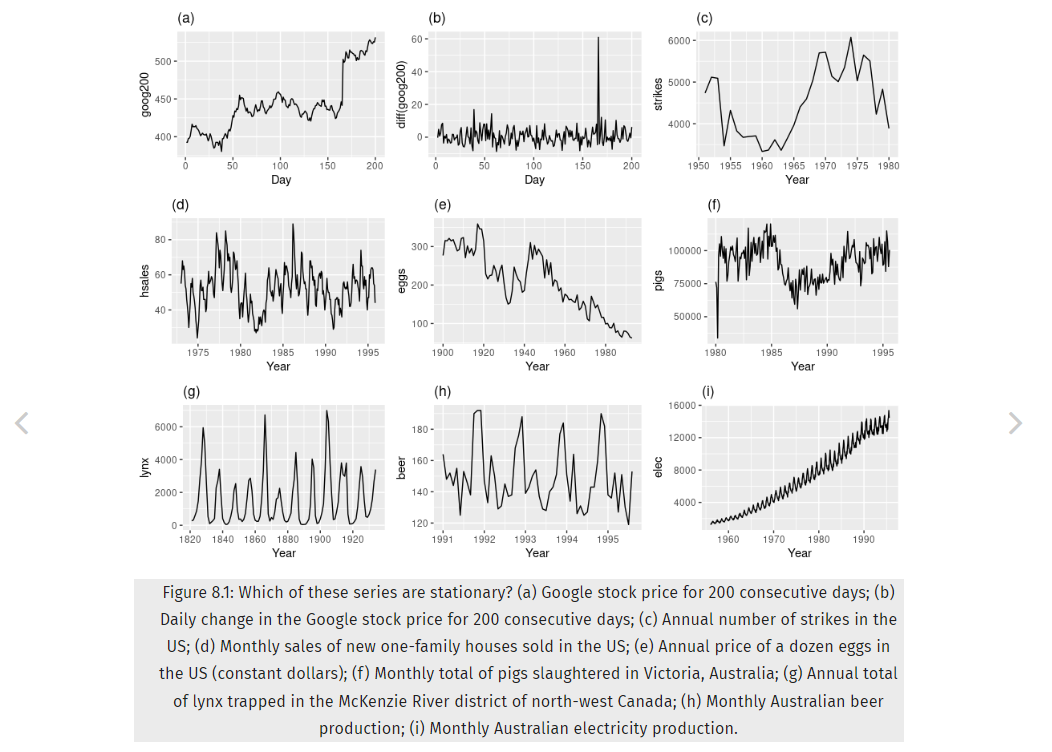

- Obvious seasonality rules out series (d), (h) and (i).
- Trends and changing levels rules out series (a), (c), (e), (f) and (i). 
- Increasing variance also rules out (i). That leaves only (b) and (g) as stationary series.




<AxesSubplot:xlabel='DATE'>

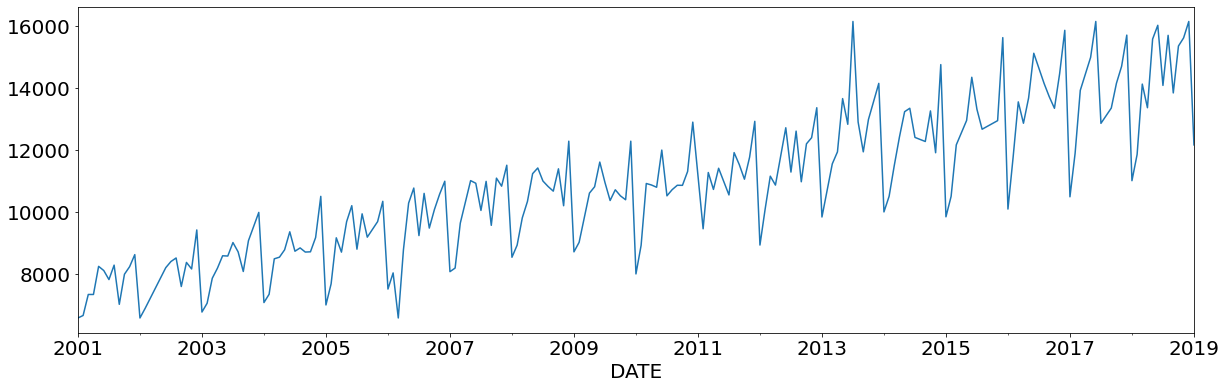

In [2]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 6)


import matplotlib
matplotlib.rcParams.update({'font.size': 20})

mobile_sales = pd.read_excel('mobilesales.xlsx')

mobile_sales.set_index("DATE",inplace=True)

mobile_sales["Sales"] = mobile_sales["Sales"].interpolate(method="linear",)
mobile_sales.Sales = mobile_sales.Sales.clip(upper=mobile_sales.Sales.quantile(0.99), lower=mobile_sales.Sales.quantile(0.01))

mobile_sales.Sales.plot()

### Dickey-Fuller Test of Stationarity : 

In [3]:
import statsmodels.api as sm

In [4]:
# Augmented Dickey-Fuller unit root test.
sm.tsa.stattools.adfuller

<function statsmodels.tsa.stattools.adfuller(x, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)>

In [5]:
sm.tsa.stattools.adfuller(mobile_sales.Sales)

(0.32893103668316,
 0.9786335779042278,
 12,
 204,
 {'1%': -3.462818103072159,
  '5%': -2.8758145932936805,
  '10%': -2.574378674548251},
 3264.0668027222423)

    Returns
    -------
    adf : float
        The test statistic.
    pvalue : float
        MacKinnon"s approximate p-value based on MacKinnon (1994, 2010).
    usedlag : int
        The number of lags used.
    nobs : int
        The number of observations used for the ADF regression and calculation
        of the critical values.
    critical values : dict
        Critical values for the test statistic at the 1 %, 5 %, and 10 %
        levels. Based on MacKinnon (2010).
    icbest : float
        The maximized information criterion if autolag is not None.
    resstore : ResultStore, optional
        A dummy class with results attached as attributes.


In [7]:
p_value = sm.tsa.stattools.adfuller(mobile_sales.Sales)[1]
p_value

0.9786335779042278

- because p-value is greater than 0.05 , hence we cannot reject null hypothesis(stationary)
- hence we conclude it is not a stationary time series 

In [10]:
def Dickey_Fuller_test(ts,significances_level = 0.05):
    p_value = sm.tsa.stattools.adfuller(ts)[1]
    if p_value <= significances_level:
        print("Time Series is Stationary")
    else:
        print("Time Series is NOT Stationary")
    print("P_value is: ", p_value)
    
Dickey_Fuller_test(mobile_sales.Sales,significances_level = 0.05)

Time Series is NOT Stationary
P_value is:  0.9786335779042278


    Y^(t) = seasonality + trend + residuals
             S(t)       + b(t)  + r(t) 
             
    r(t) = Y^(t) - b(t) - S(t)

In [26]:
model = sm.tsa.seasonal_decompose(mobile_sales.Sales, model='additive')

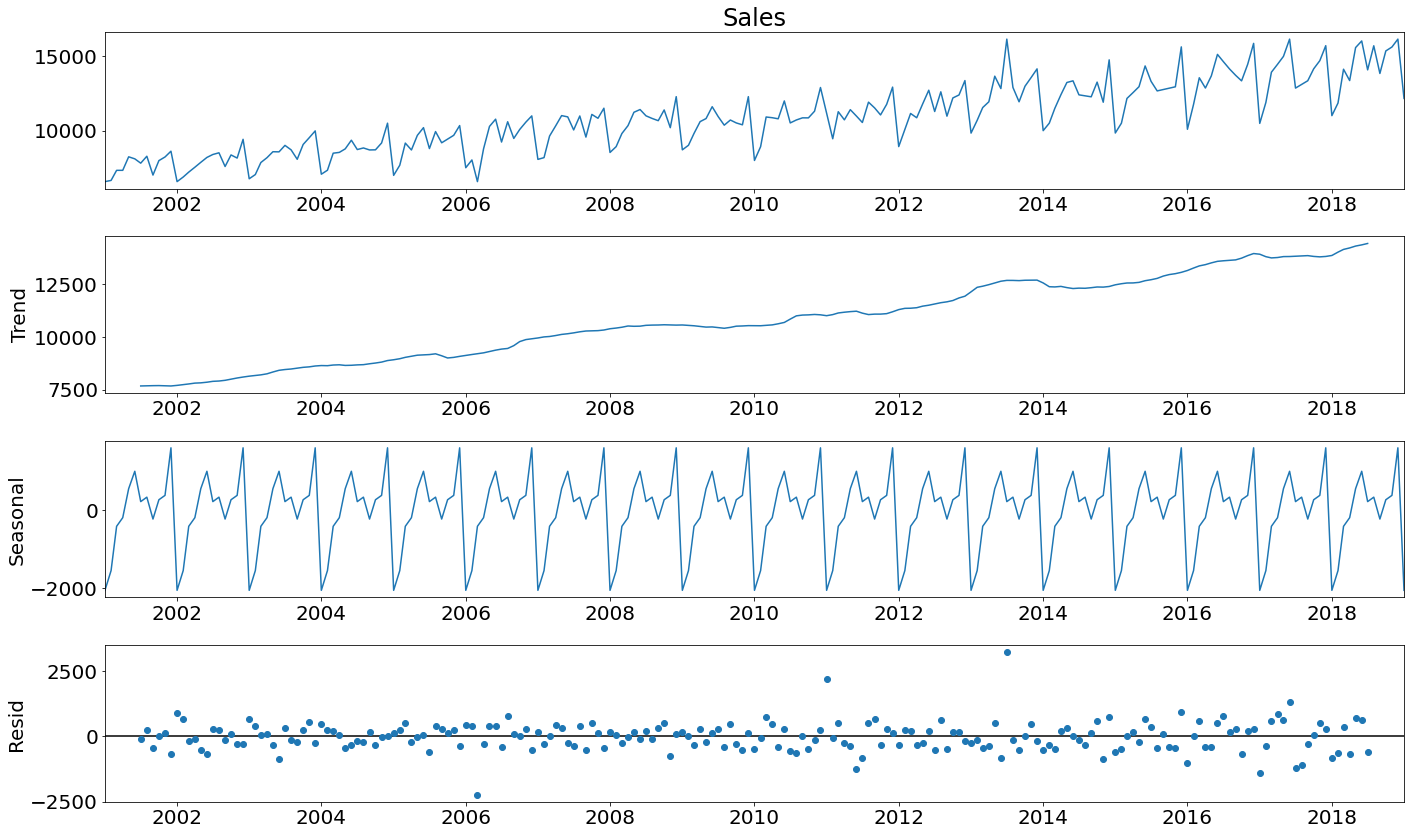

In [27]:
plt.rcParams['figure.figsize'] = (20, 12)

model.plot();


<AxesSubplot:xlabel='DATE'>

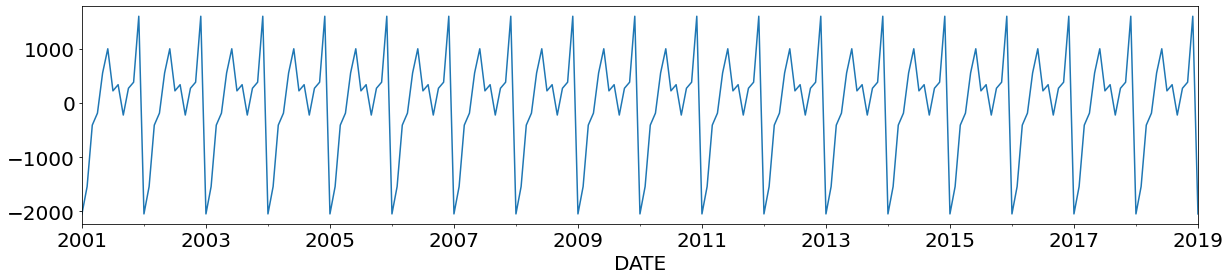

In [28]:
plt.rcParams['figure.figsize'] = (20, 4)
model.seasonal.plot()

<AxesSubplot:xlabel='DATE'>

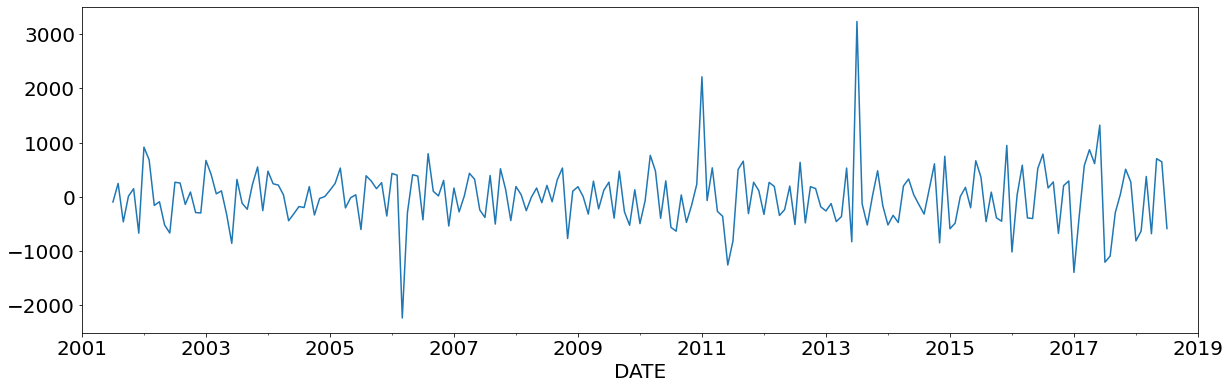

In [31]:
plt.rcParams['figure.figsize'] = (20, 6)
model.resid.plot()

In [32]:
Dickey_Fuller_test(model.resid.dropna(),significances_level = 0.05)

Time Series is Stationary
P_value is:  3.7134101382154216e-08


In [ ]:
# residuals are stationary

------------

<AxesSubplot:xlabel='DATE'>

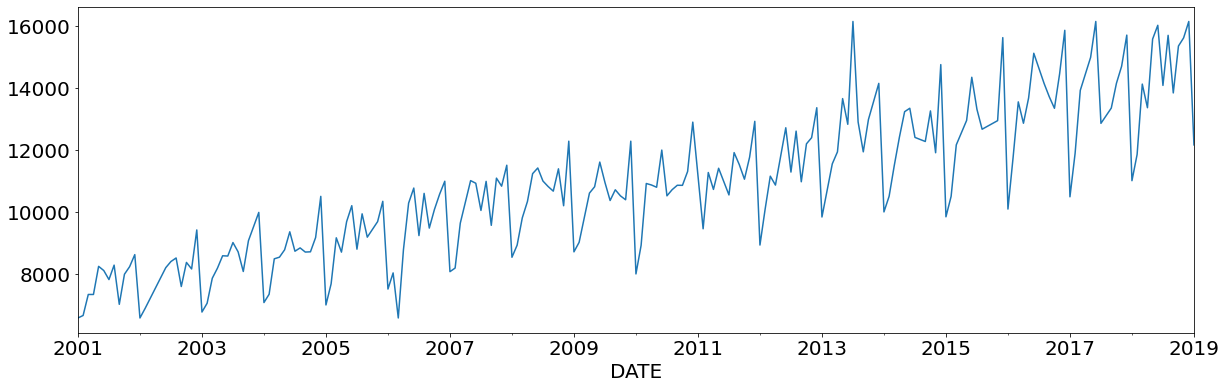

In [36]:
mobile_sales.Sales.plot()

In [37]:
Dickey_Fuller_test(mobile_sales.Sales)

Time Series is NOT Stationary
P_value is:  0.9786335779042278


<AxesSubplot:xlabel='DATE'>

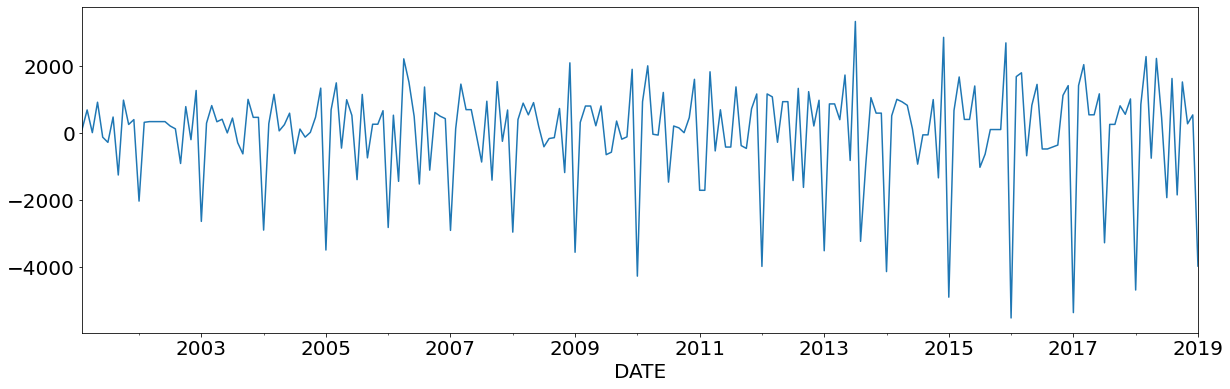

In [43]:
# differentiation of time series 
mobile_sales.Sales.diff().dropna().plot()


In [42]:
Dickey_Fuller_test(mobile_sales.Sales.diff().dropna())

Time Series is Stationary
P_value is:  1.0038630872312617e-16


<AxesSubplot:xlabel='DATE'>

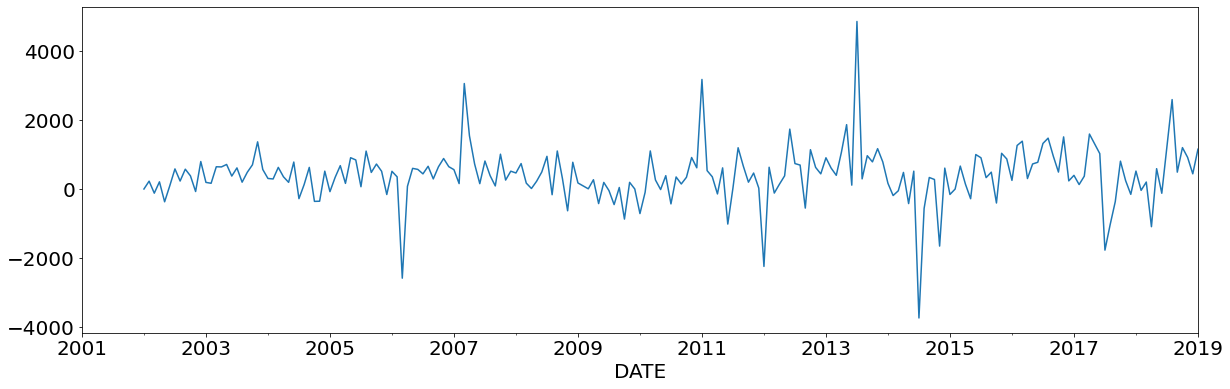

In [51]:
# seasonal differentiation of TS 
# de-seasoned TS
mobile_sales.Sales.diff(12).plot()


In [52]:
Dickey_Fuller_test(mobile_sales.Sales.diff(12).dropna())

Time Series is Stationary
P_value is:  3.204073010542101e-07


### Use of Auto-correlation : 
### How can we detect the period of seasonality using Auto-Correlation :

## Auto-correlation

In [86]:
present = mobile_sales.Sales[:-1]

In [87]:
past = mobile_sales.Sales.shift(-1)[:-1]


In [88]:
present.head()

DATE
2001-01-01    6573.36
2001-02-01    6654.00
2001-03-01    7332.00
2001-04-01    7332.00
2001-05-01    8240.00
Name: Sales, dtype: float64

In [89]:
past.head()

DATE
2001-01-01    6654.0
2001-02-01    7332.0
2001-03-01    7332.0
2001-04-01    8240.0
2001-05-01    8104.0
Name: Sales, dtype: float64

In [90]:
np.corrcoef(present,past)


array([[1.        , 0.79748607],
       [0.79748607, 1.        ]])

In [83]:
# 0.7974 is the correlation , between future and present values

In [98]:
present = mobile_sales.Sales[:-12]
past = mobile_sales.Sales.shift(-12)[:-12]
np.corrcoef(present,past)


array([[1.        , 0.93452699],
       [0.93452699, 1.        ]])

In [101]:
np.corrcoef(present,past)[0][-1]

0.9345269854939392

In [104]:
correlations = []
for lag in range(1,36):
    present = mobile_sales.Sales[:-lag]
    past = mobile_sales.Sales.shift(-lag)[:-lag]
    corrs = np.corrcoef(present,past)[0][-1]
    print(corrs)
    correlations.append(corrs)


0.7974860661369779
0.7415743529029631
0.7241765823939108
0.717634802285343
0.7353644817001721
0.7890105553976016
0.7230081812553393
0.7043985690089325
0.7041272032592011
0.7002981716003844
0.7804297905306361
0.9345269854939392
0.7571782332282511
0.7110619946934471
0.6836429676821068
0.677524582175136
0.7139512901217141
0.7521679609779462
0.6873787656118754
0.6826605095463903
0.6663705956619103
0.6806120431209901
0.7649938428239481
0.9179924729920567
0.7303886241039367
0.6813658413097418
0.6493689879078951
0.659662766169608
0.6828768942649165
0.7280837627592401
0.6695213626474041
0.6600206626637894
0.6200067358415148
0.6601911348199336
0.7387194122552819


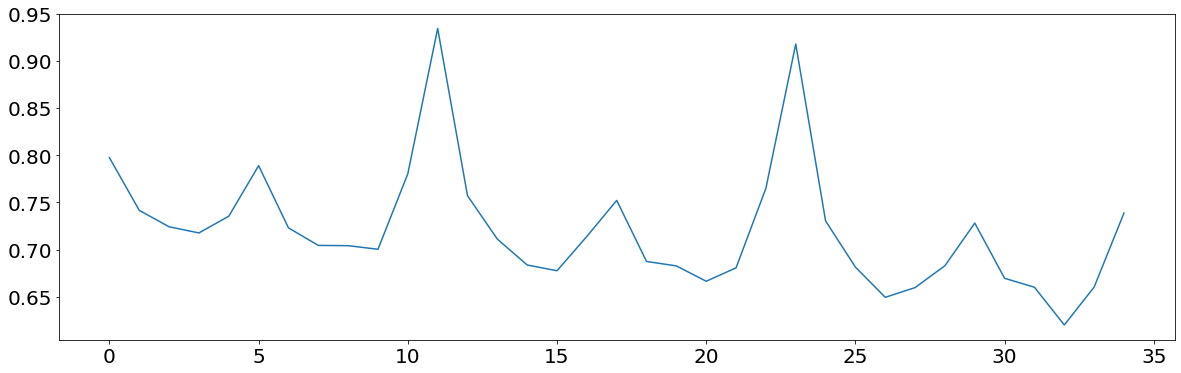

In [106]:
plt.plot(correlations)

<StemContainer object of 3 artists>

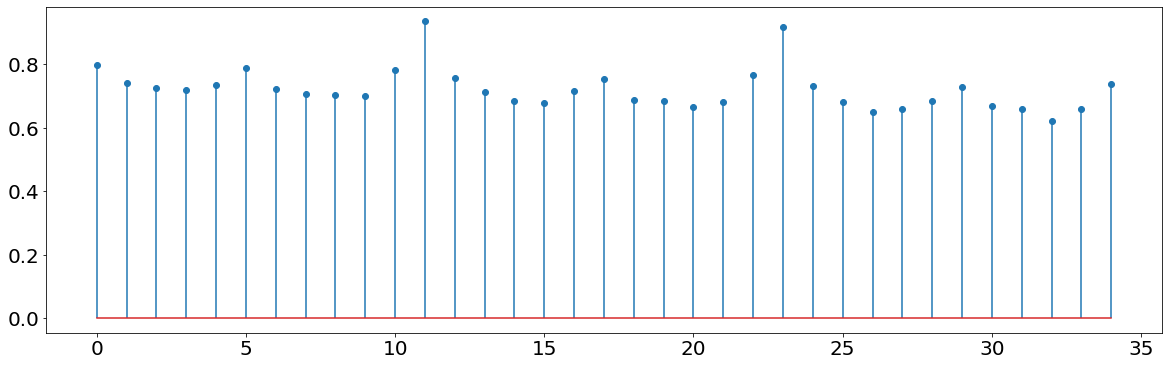

In [107]:
plt.stem(correlations)

In [108]:
# Thats how we know the period of time series 
# From above stem plot , we can observe , 
# that TS doent just have yearly but also half-yearly seasonality also 

#### Using Statsmodel :

In [110]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

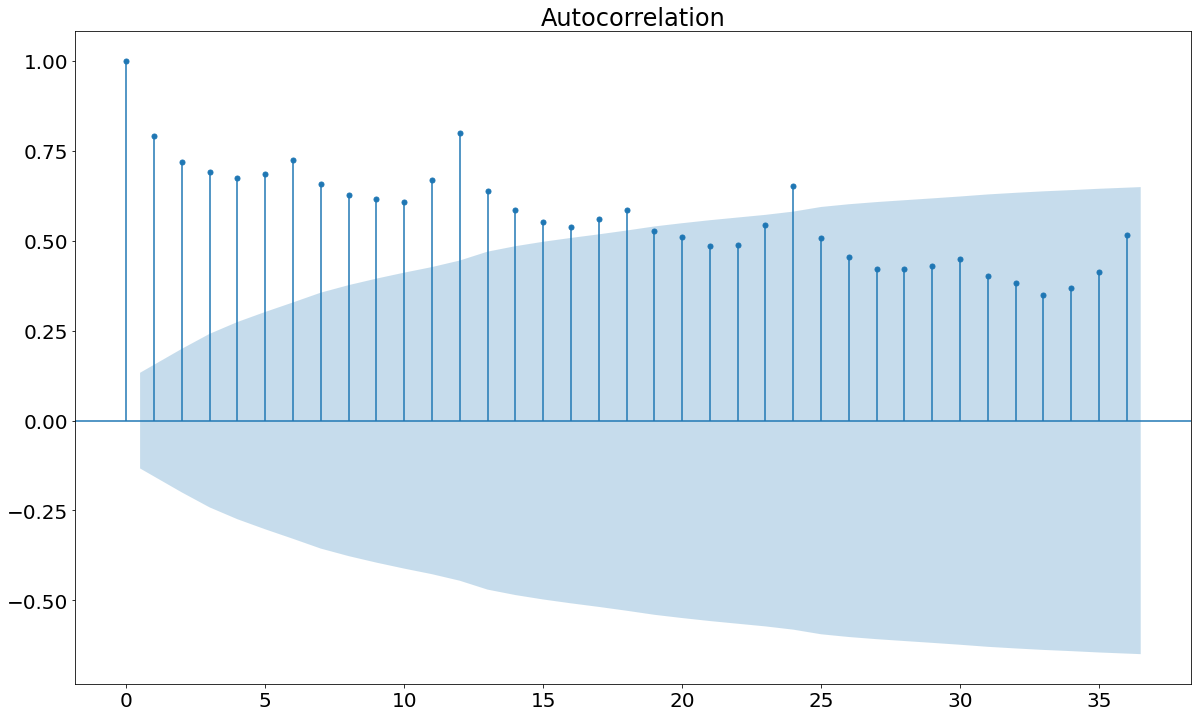

In [116]:
plt.rcParams['figure.figsize'] = (20, 12)
plot_acf(mobile_sales.Sales,lags=36);

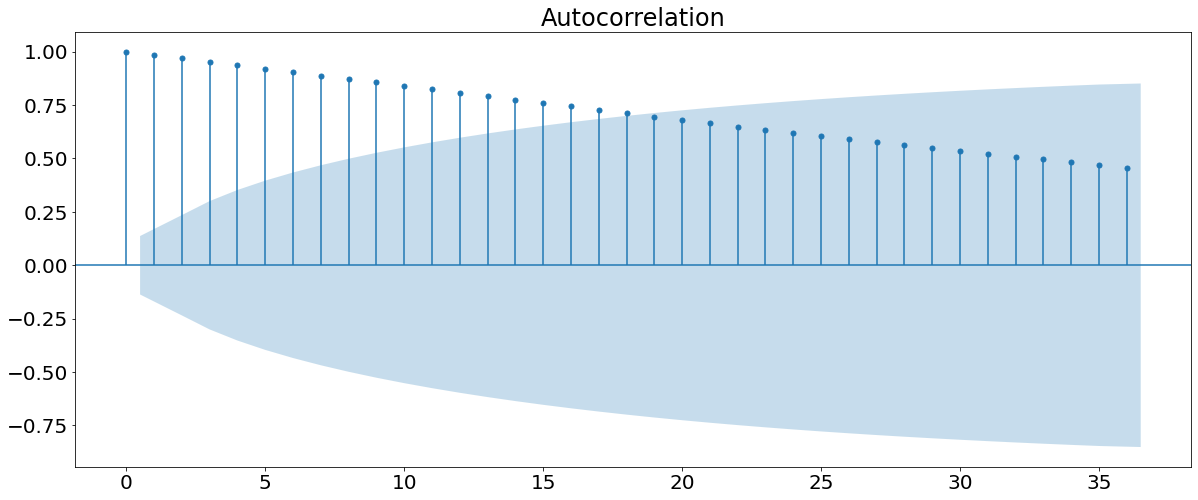

In [122]:
plt.rcParams['figure.figsize'] = (20, 8)
plot_acf(model.trend.dropna(),lags=36);

# deceasing trend 

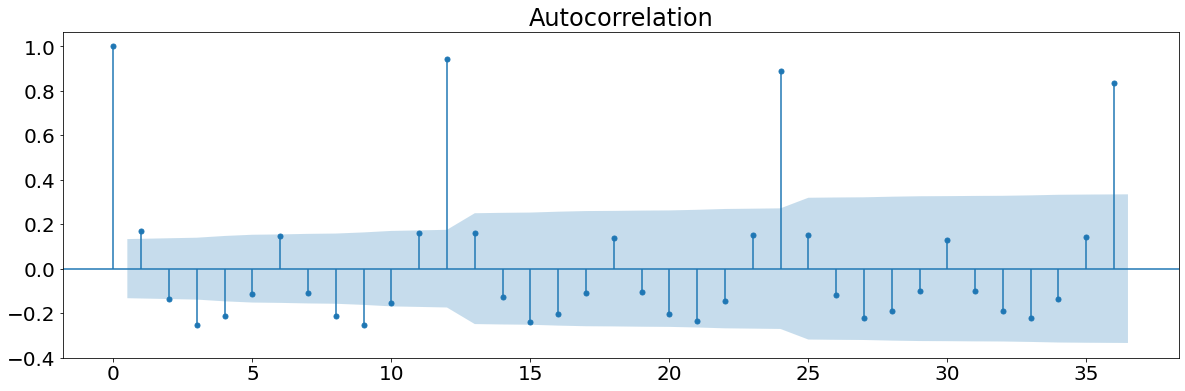

In [121]:
plt.rcParams['figure.figsize'] = (20, 6)
plot_acf(model.seasonal,lags=36);

# seasonality  

In [ ]:
# Partial Autocorrelation eliminates the indirect correlations that happens through the lags 

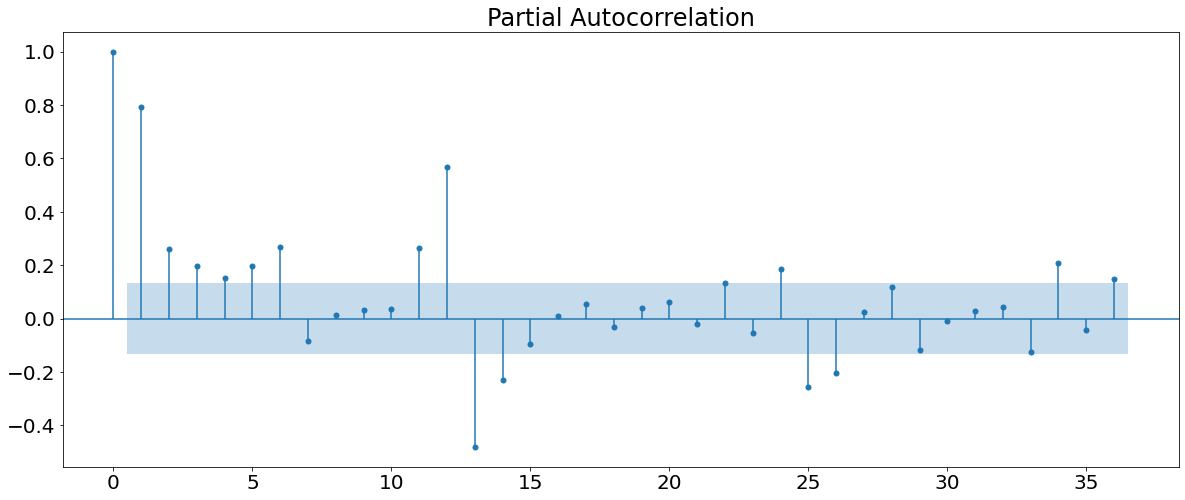

In [127]:
plot_pacf(mobile_sales.Sales,lags=36);

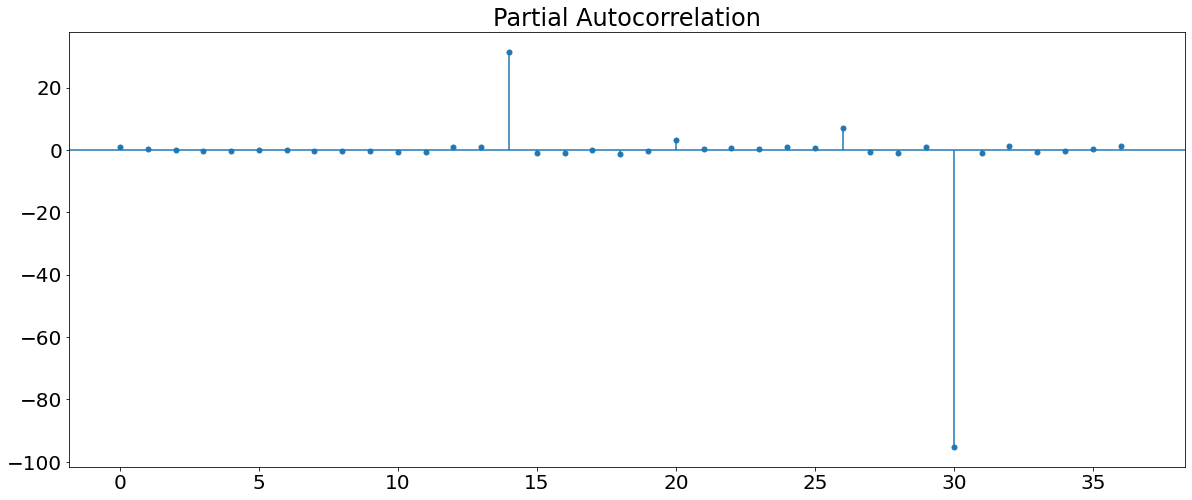

In [125]:
plot_pacf(model.seasonal,lags=36);

    Revision: 
    
        
        In additive: (Holt-winter method)
            Simple Exponential Smoothing : Level of series
            Double Exponential Smoothing : level + (growth*steps)   # increasing straight line without seasonality
            Triple Exponential Smoothing : Level + (growth*steps) + level of seasonal 
    
    
    Stationarity : 
                signla who's properties are not preditively changing
                (doesnt have trend and seasonality)
    
    
     acf- pacf plots : 
         autocorrelation that helps us find the trend and priod of reasonality 
                

-  ###  Q:  The number of smoothing constants used in the smoothing method of forecasting which considers seasonality in addition to trend is:


        
        Three constants are used

        Explanation:
        In the method triple exponential smoothing we can use constants for adjusting forecast error for

        previous observation(alpha)
        trend(beta) and,
        seasonality(gamma).


### Q: 

In [167]:
dates = ['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11', '2018-01-12', '2018-01-13', '2018-01-14', '2018-01-15', '2018-01-16', '2018-01-17', '2018-01-18', '2018-01-19', '2018-01-20', '2018-01-21', '2018-01-22', '2018-01-23', '2018-01-24', '2018-01-25', '2018-01-26', '2018-01-27', '2018-01-28', '2018-01-29', '2018-01-30', '2018-01-31', '2018-02-01', '2018-02-02', '2018-02-03', '2018-02-04', '2018-02-05', '2018-02-06', '2018-02-07', '2018-02-08', '2018-02-09', '2018-02-10', '2018-02-11', '2018-02-12', '2018-02-13', '2018-02-14', '2018-02-15', '2018-02-16', '2018-02-17', '2018-02-18', '2018-02-19', '2018-02-20', '2018-02-21', '2018-02-22', '2018-02-23', '2018-02-24', '2018-02-25', '2018-02-26', '2018-02-27', '2018-02-28', '2018-03-01', '2018-03-02', '2018-03-03', '2018-03-04', '2018-03-05', '2018-03-06', '2018-03-07', '2018-03-08', '2018-03-09', '2018-03-10', '2018-03-11', '2018-03-12', '2018-03-13', '2018-03-14', '2018-03-15', '2018-03-16', '2018-03-17', '2018-03-18', '2018-03-19', '2018-03-20', '2018-03-21', '2018-03-22', '2018-03-23', '2018-03-24', '2018-03-25', '2018-03-26', '2018-03-27', '2018-03-28', '2018-03-29', '2018-03-30', '2018-03-31', '2018-04-01', '2018-04-02', '2018-04-03', '2018-04-04', '2018-04-05', '2018-04-06', '2018-04-07', '2018-04-08', '2018-04-09', '2018-04-10', '2018-04-11', '2018-04-12', '2018-04-13', '2018-04-14', '2018-04-15', '2018-04-16', '2018-04-17', '2018-04-18', '2018-04-19', '2018-04-20', '2018-04-21', '2018-04-22', '2018-04-23', '2018-04-24', '2018-04-25', '2018-04-26', '2018-04-27', '2018-04-28', '2018-04-29', '2018-04-30', '2018-05-01', '2018-05-02', '2018-05-03', '2018-05-04', '2018-05-05', '2018-05-06', '2018-05-07', '2018-05-08', '2018-05-09', '2018-05-10', '2018-05-11', '2018-05-12', '2018-05-13', '2018-05-14', '2018-05-15', '2018-05-16', '2018-05-17', '2018-05-18', '2018-05-19', '2018-05-20', '2018-05-21', '2018-05-22', '2018-05-23', '2018-05-24', '2018-05-25', '2018-05-26', '2018-05-27', '2018-05-28', '2018-05-29', '2018-05-30', '2018-05-31', '2018-06-01', '2018-06-02', '2018-06-03', '2018-06-04', '2018-06-05', '2018-06-06', '2018-06-07', '2018-06-08', '2018-06-09', '2018-06-10', '2018-06-11', '2018-06-12', '2018-06-13', '2018-06-14', '2018-06-15', '2018-06-16', '2018-06-17', '2018-06-18', '2018-06-19', '2018-06-20', '2018-06-21', '2018-06-22', '2018-06-23', '2018-06-24', '2018-06-25', '2018-06-26', '2018-06-27', '2018-06-28', '2018-06-29', '2018-06-30', '2018-07-01', '2018-07-02', '2018-07-03', '2018-07-04', '2018-07-05', '2018-07-06', '2018-07-07', '2018-07-08', '2018-07-09', '2018-07-10', '2018-07-11', '2018-07-12', '2018-07-13', '2018-07-14', '2018-07-15', '2018-07-16', '2018-07-17', '2018-07-18', '2018-07-19', '2018-07-20', '2018-07-21', '2018-07-22', '2018-07-23', '2018-07-24', '2018-07-25', '2018-07-26', '2018-07-27', '2018-07-28', '2018-07-29', '2018-07-30', '2018-07-31', '2018-08-01', '2018-08-02', '2018-08-03', '2018-08-04', '2018-08-05', '2018-08-06', '2018-08-07', '2018-08-08', '2018-08-09', '2018-08-10', '2018-08-11', '2018-08-12', '2018-08-13', '2018-08-14', '2018-08-15', '2018-08-16', '2018-08-17', '2018-08-18', '2018-08-19', '2018-08-20', '2018-08-21', '2018-08-22', '2018-08-23', '2018-08-24', '2018-08-25', '2018-08-26', '2018-08-27', '2018-08-28', '2018-08-29', '2018-08-30', '2018-08-31', '2018-09-01', '2018-09-02', '2018-09-03', '2018-09-04', '2018-09-05', '2018-09-06', '2018-09-07', '2018-09-08', '2018-09-09', '2018-09-10', '2018-09-11', '2018-09-12', '2018-09-13', '2018-09-14', '2018-09-15', '2018-09-16', '2018-09-17', '2018-09-18', '2018-09-19', '2018-09-20', '2018-09-21', '2018-09-22', '2018-09-23', '2018-09-24', '2018-09-25', '2018-09-26', '2018-09-27', '2018-09-28', '2018-09-29', '2018-09-30', '2018-10-01', '2018-10-02', '2018-10-03', '2018-10-04', '2018-10-05', '2018-10-06', '2018-10-07', '2018-10-08', '2018-10-09', '2018-10-10', '2018-10-11', '2018-10-12', '2018-10-13', '2018-10-14', '2018-10-15', '2018-10-16', '2018-10-17', '2018-10-18', '2018-10-19', '2018-10-20', '2018-10-21', '2018-10-22', '2018-10-23', '2018-10-24', '2018-10-25', '2018-10-26', '2018-10-27', '2018-10-28', '2018-10-29', '2018-10-30', '2018-10-31', '2018-11-01', '2018-11-02', '2018-11-03', '2018-11-04', '2018-11-05', '2018-11-06', '2018-11-07', '2018-11-08', '2018-11-09', '2018-11-10', '2018-11-11', '2018-11-12', '2018-11-13', '2018-11-14', '2018-11-15', '2018-11-16', '2018-11-17', '2018-11-18', '2018-11-19', '2018-11-20', '2018-11-21', '2018-11-22', '2018-11-23', '2018-11-24', '2018-11-25', '2018-11-26', '2018-11-27', '2018-11-28', '2018-11-29', '2018-11-30', '2018-12-01', '2018-12-02', '2018-12-03', '2018-12-04', '2018-12-05', '2018-12-06', '2018-12-07', '2018-12-08']
units_sold = [147, 342, 380, 292, 114, 311, 339, 90, 446, 302, 149, 362, 165, 103, 90, 473, 24, 391, 472, 427, 294, 169, 116, 378, 62, 296, 33, 89, 485, 224, 404, 281, 137, 238, 381, 335, 121, 182, 6, 376, 46, 445, 353, 377, 61, 119, 245, 302, 49, 72, 350, 376, 254, 432, 80, 120, 151, 167, 44, 123, 390, 456, 410, 64, 155, 406, 6, 326, 199, 32, 24, 76, 174, 376, 325, 517, 255, 81, 70, 339, 395, 484, 408, 386, 362, 353, 207, 52, 435, 360, 430, 410, 491, 168, 378, 120, 308, 486, 67, 287, 258, 354, 319, 123, 35, 235, 304, 342, 407, 36, 257, 270, 1, 140, 456, 466, 6, 8, 446, 451, 44, 430, 431, 256, 470, 400, 231, 178, 435, 109, 405, 450, 375, 278, 136, 272, 444, 111, 109, 232, 285, 492, 162, 10, 86, 180, 302, 198, 463, 341, 351, 155, 47, 90, 202, 404, 52, 483, 510, 500, 413, 164, 496, 212, 162, 302, 103, 362, 16, 495, 181, 9, 63, 311, 424, 398, 170, 325, 236, 188, 396, 457, 106, 355, 299, 319, 308, 220, 253, 440, 373, 493, 475, 387, 376, 240, 184, 269, 406, 180, 374, 228, 378, 322, 380, 211, 309, 124, 37, 42, 367, 173, 252, 278, 518, 163, 102, 304, 197, 206, 266, 24, 134, 255, 453, 228, 139, 195, 395, 428, 414, 246, 299, 315, 321, 289, 35, 38, 314, 97, 77, 359, 299, 375, 410, 228, 223, 16, 454, 62, 96, 270, 65, 477, 392, 506, 333, 164, 46, 184, 149, 62, 387, 187, 358, 27, 328, 411, 201, 45, 231, 98, 237, 46, 391, 69, 452, 239, 267, 193, 486, 70, 8, 14, 299, 487, 412, 453, 112, 12, 279, 459, 20, 429, 86, 109, 132, 133, 403, 30, 169, 377, 486, 407, 306, 185, 457, 408, 280, 384, 119, 92, 40, 318, 120, 372, 44, 115, 214, 452, 41, 417, 102, 44, 1, 247, 178, 240, 80, 388, 209, 439, 345, 125, 243, 381, 377, 196, 504, 352, 322, 336]

In [168]:
df = pd.DataFrame({'dates':dates, 'units_sold': units_sold})
df['dates'] = pd.to_datetime(df['dates'])

In [169]:
df["month"]= df["dates"].dt.month

In [170]:
df

,dates,units_sold,month
0,2018-01-01,147,1
1,2018-01-02,342,1
2,2018-01-03,380,1
3,2018-01-04,292,1
4,2018-01-05,114,1
...,...,...,...
337,2018-12-04,196,12
338,2018-12-05,504,12
339,2018-12-06,352,12
340,2018-12-07,322,12


In [171]:
# df.groupby("month")["units_sold"].mean().round(2)

In [172]:
df['average_sales'] = df.groupby("month")["units_sold"].transform("mean")

In [173]:
ans = df[['month', 'average_sales']].drop_duplicates()

In [175]:
ans.reset_index(drop=True, inplace = True)


In [177]:
ans

,month,average_sales
0,1,257.064516
1,2,217.857143
2,3,266.000000
3,4,268.633333
4,5,279.548387
5,6,262.300000
6,7,293.064516
7,8,246.451613
8,9,234.066667
9,10,242.870968


In [ ]:
# df = pd.DataFrame({'dates':dates, 'units_sold': units_sold})
# 

In [197]:
Start_station = ['Broad St', '66 St-Lincoln Center', 
                 '86th St', 'Times Sq - 42 St', '86th St',
                 'Bowery', '66 St-Lincoln Center', 
                 '66 St-Lincoln Center', '14 St / 8 Av', 'Times Sq - 42 St']
End_station = ['14 St / 8 Av', 'Bowery', 'Bowery', 
               '66 St-Lincoln Center', '66 St-Lincoln Center', 'Broad St',
               'Broad St', 'Broad St', '14 St / 8 Av', 'Times Sq - 42 St']
Duration = [0.12, 1.94, 2.47, 1.53, 2.76, 1.93, 0.33, 0.94, 2.71, 1.39]

rides = pd.DataFrame({"Start station":Start_station,
             "End station":End_station,
             "Duration":Duration})

In [198]:
joyrides = (rides['End station'] == rides['End station'])

In [199]:
rides["Duration"].median()

1.73

In [203]:
rides[rides["Start station"]==rides["End station"]]["Duration"].median()

2.05

# ARIMA Family of Forecasting Techniques


## Auto Regression (AR)

- For stationary time series, one is helpless because of the absence of a pattern in the series.


- Any trend or seasonality that was present has been removed from the series, and it will be added back later, in the final prediction.


- In AR we forecast the variable of interest using a linear combination of past values of the variable.



- Though such series look like they are completely random, there is still some extent of forecastability here, there is still information left to be extracted from stationary series.



- ##### What if we had a feature in our time series, besides the value to be predicted?


- In that case, one could just utilize Linear Regression, by mapping this feature's values with the value to be forecasted.

- For creating a new feature, we can map the value of the stationary time series at time 

- 𝑡 with the value of series at time 𝑡−1,𝑡−2,𝑡−3,...,𝑡−𝑝, where p could be a hyperparameter we set.

- This way, now our data becomes as shown.

    - It contains date as the index,
    - Past values 𝑦𝑡−1, 𝑦𝑡−2, ..., 𝑦𝑡−𝑝  as features and 
    - value at time 𝑡 as the value to be predicted (𝑦^t)
    
- Now we can successfully implement Linear Regression using these features.


                
        <-----------------Xi----------------> yi()
                                         
         y(t-p).....         y(t-2)  y(t-1)    y(t)  
      y(t-p-1).....         y(t-3)  y(t-2)    y(t-1)
      y(t-p-2).....         y(t-4)  y(t-3)    y(t-2)
      y(t-p-3).....         y(t-5)  y(t-4)    y(t-3)
      ....
      ....
      y(0)    .....        u(t-p-2)  y(t-p-1)   y(p)

- Since the aim is to convert the forecasting problem to Linear Regression, what we’re doing is;

         -  Future value 𝑦̂(𝑡)  = LinearRegression(Past p values)
     
     

- Thus, the forecasting problem is converted into the following form:
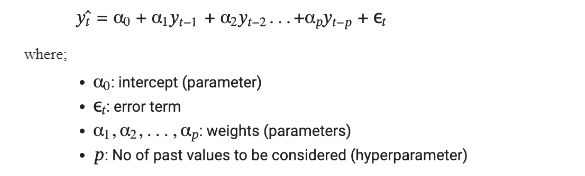	

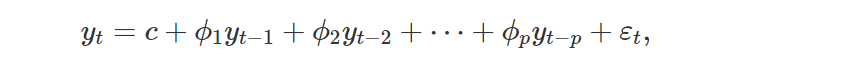
    - t is a residual term considered as a purely random series with mean 0, variance 2 and covariance is 0.
   - This seems similar to Simple Exponential Smoothing (SES). 
   - Though we are essentially doing a weighted average of the past time series values in both SES and AR models, there is a fundamental difference.


- In the case of SES,
    - The weights are exponentially decaying
    - The hyperparameter is α


- In the case of AR,
    - The weights are learnt by multiple iterations.
    - The hyperparameter is 𝑝
    
#### Pre-requisites of the AR model:

- The idea is that this assumption will be true if the Partial Auto Correlation(PACF)  Plot has a high value at lag = k.

- This way, from the plot we know that the future value is highly correlated with one value in the past, which means that it makes sense for us to compute linear regression on the past 1 value.

- We are using PACF because we don't want features to be correlated with each other in LR. PACF can help to identify that.



#### Deciding the value of p


- We look at the PACF plot, and based on the values there, we decide how many lag values we can consider.


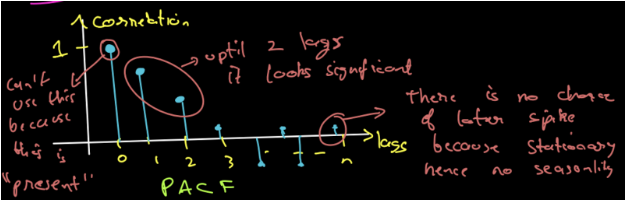

- For example, in the given plot,
- we consider 2 lags only,
- as for the third lag, the PACF value is 0.1, so considering it will not give as promising results.
- The simplest AR process is AR(0), which has no dependence between the terms. In fact, AR(0) is essentially white noise.
- We can select the order 𝑝 for AR(𝑝) model based on significant spikes from the PACF plot. 
- One more indication of the AR process is that the ACF plot decays more slowly.




8.4 : https://otexts.com/fpp2/MA.html

## Moving Averages (MA)

- The idea here is to use the value of the series at time t-1, we use the error of value at t-1 from the mean of data in the regression setup.


- The error of each data point in the series from the mean/average, would be different.

- This should also work, as we are able to successfully create a new feature that is unique for each point.

- In fact, this idea is called the Moving Averages (MA) technique.

- Moving Average process considers the past residual values to predict the current time period values.

- One problem of the AR model is the ignorance of correlated noise structures (which are unobservable) in the time series.

- Contrary to the AR model, the finite MA model is always stationary because the observation is just a weighted moving average over past forecast errors.

- `Though the name is the same as the smoothing technique, this has nothing to do with that and is a completely different concept.`

- The formulation of MA is as follows:

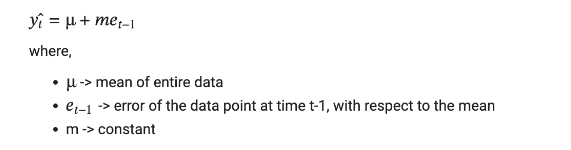

- This idea can be extended to the order of q. In that case, the formulation becomes:

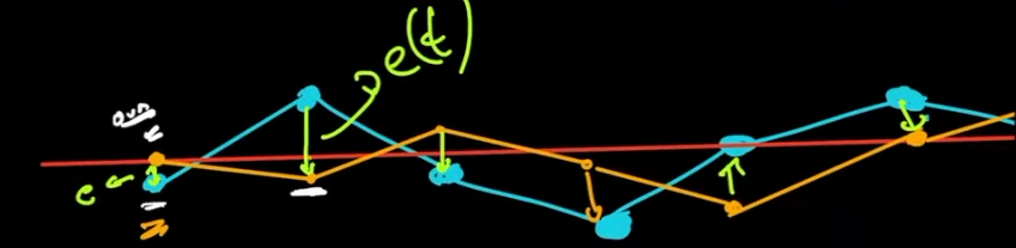

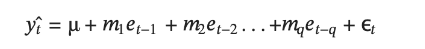
    
    
- Here, ε represents the final error remaining that is actually truly random, which we cannot help. This is also added for representation.



##### NOTE:

- q becomes the hyperparameter for the MA(q) model

- In the case of MA, there is a fixed way to determine the value of q, we need to try a bunch of different values to find the best fit.
- ACF provides a considerable amount of information about the order of the dependence q for the MA(q) process. 
- Identification of an MA model is often best done with the ACF rather than the PACF.
- In contrast to the AR model, we can select the order q for model MA(q) from ACF if this plot has a sharp cut-off after lag q.
- One more indication of the MA process is that the PACF plot decays more slowly.




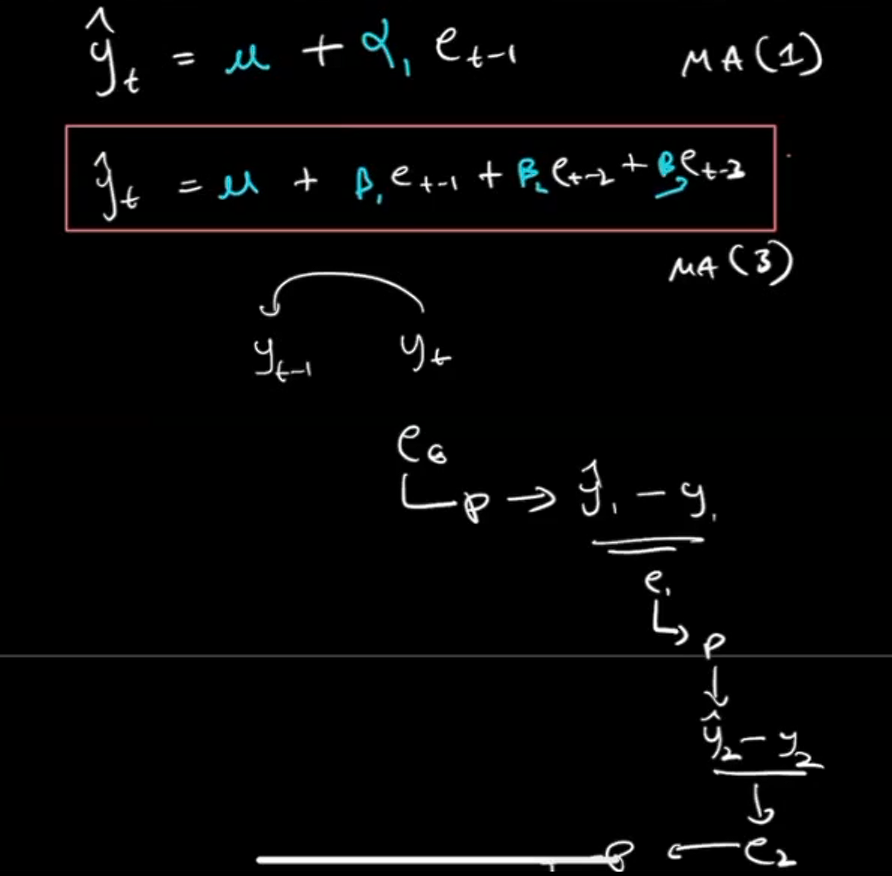

## ARMA (p,q)

- The combined technique of Auto Regression (AR) and Moving Averages (MA) is called the ARMA model.

- While combining the two ideas, p: order of AR and q: order of MA, p may or may not be equal to q

- α1, α2,..., α𝑝: coefficients of AR
- 𝑚1, 𝑚2,..., 𝑚𝑞: coefficients of MA


- Hence the formulation becomes:
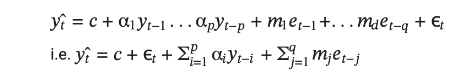

- Here, p and q are hyperparameters. Thus it is also called ARMA(p,q) model.

- The major limitation of this technique is that it cannot handle non-stationary time series because, if we're training a Linear Regression, the variables can not be dependent on each other.

- This method can not handle if there is a trend or seasonality present in the data.

- For the AR term refer to the PACF plot which tells about the lag terms and for the MA term refer to the ACF plot which tells about the error terms.



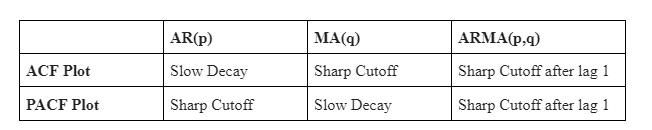

#### Limitations of ARMA:

- Cannot handle non-stationary series and we cannot handle seasonal lags.

- Differencing causes the loss of one data point. If the order is 1 and in the case of the differencing the series the value will be NA.

- After the differencing the scale of the series will be changed. So, the forecast will also be on a different scale and we need to manually adjust the by retransforming by doing integration.


## example : 

In [17]:
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae, 
    mean_absolute_percentage_error as mape
)

# Creating a function to print values of all these metrics.
def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3)) 
    print('MAPE:', round(mape(actual, predicted), 3))

<AxesSubplot:xlabel='DATE'>

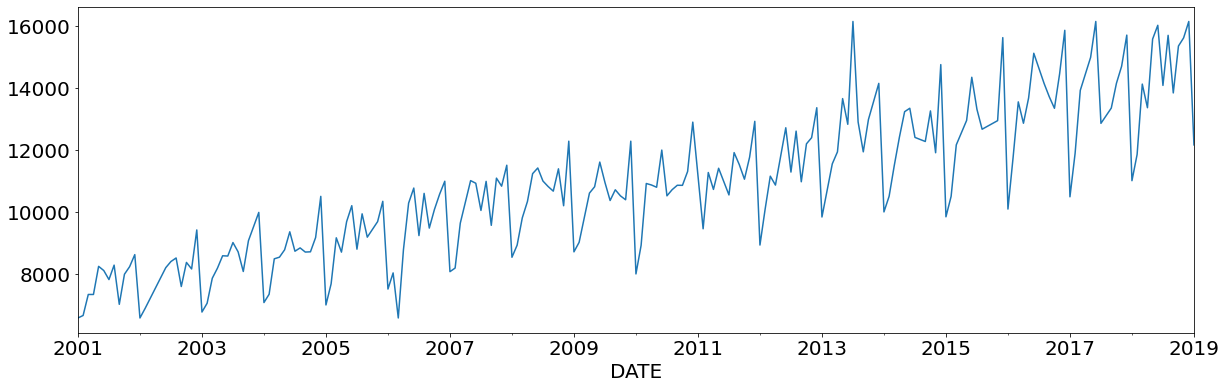

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 6)


import matplotlib
matplotlib.rcParams.update({'font.size': 20})

mobile_sales = pd.read_excel('mobilesales.xlsx')

mobile_sales.set_index("DATE",inplace=True)

mobile_sales["Sales"] = mobile_sales["Sales"].interpolate(method="linear",)
mobile_sales.Sales = mobile_sales.Sales.clip(upper=mobile_sales.Sales.quantile(0.99), lower=mobile_sales.Sales.quantile(0.01))

mobile_sales.Sales.plot()

In [2]:
X_train = mobile_sales.loc[mobile_sales.index < mobile_sales.index[-12]].copy()
X_test = mobile_sales.loc[mobile_sales.index >= mobile_sales.index[-12]].copy()

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
import statsmodels.api as sm

In [8]:
model = sm.tsa.ExponentialSmoothing(
                                        X_train.Sales,
                                        trend="additive",
                                        seasonal="multiplicative",
                        )
model = model.fit(smoothing_level=None,
    smoothing_trend=None,
    smoothing_seasonal=None)

<AxesSubplot:>

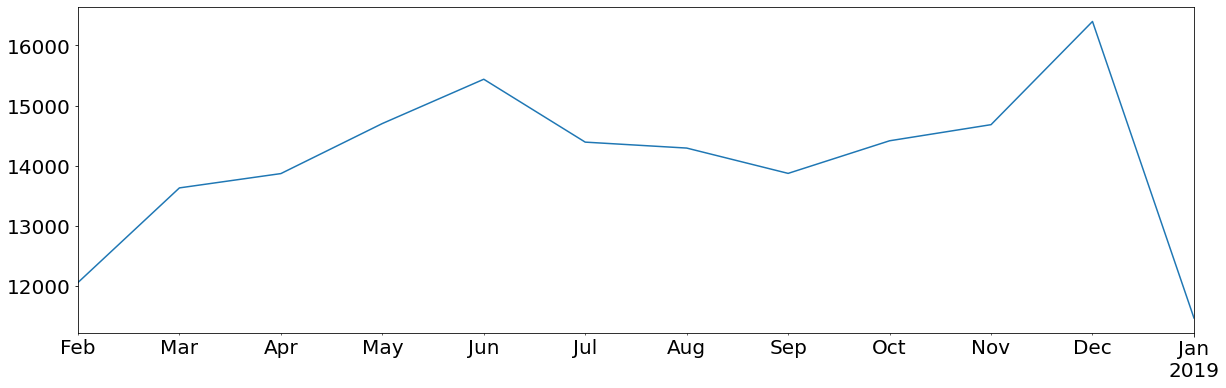

<AxesSubplot:xlabel='DATE'>

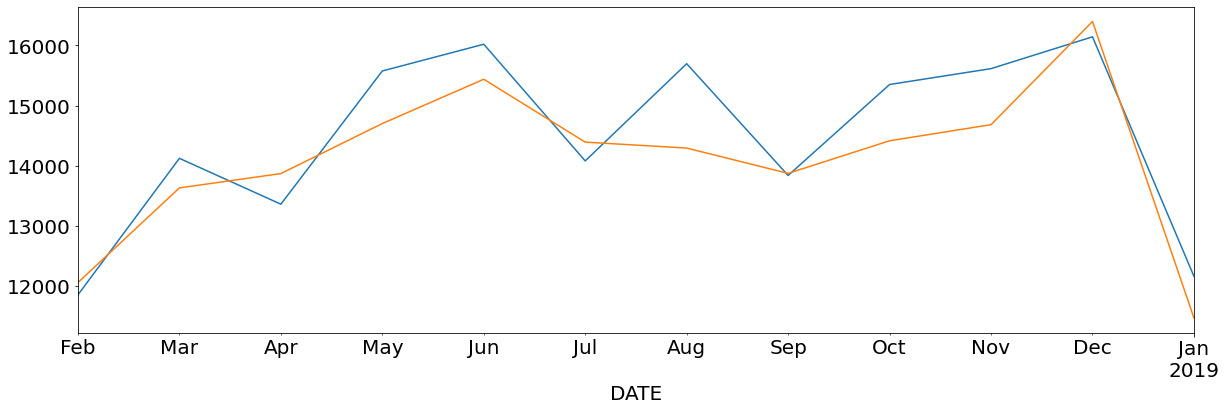

In [16]:
X_test.Sales.plot()
model.forecast(12).plot()


In [22]:
X_test["Pred"] = model.forecast(steps=12).values

In [23]:

actual = X_test.Sales
predicted = X_test.Pred
performance(actual, predicted)

MAE : 602.431
RMSE : 707.432
MAPE: 0.041


In [24]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

<AxesSubplot:xlabel='DATE'>

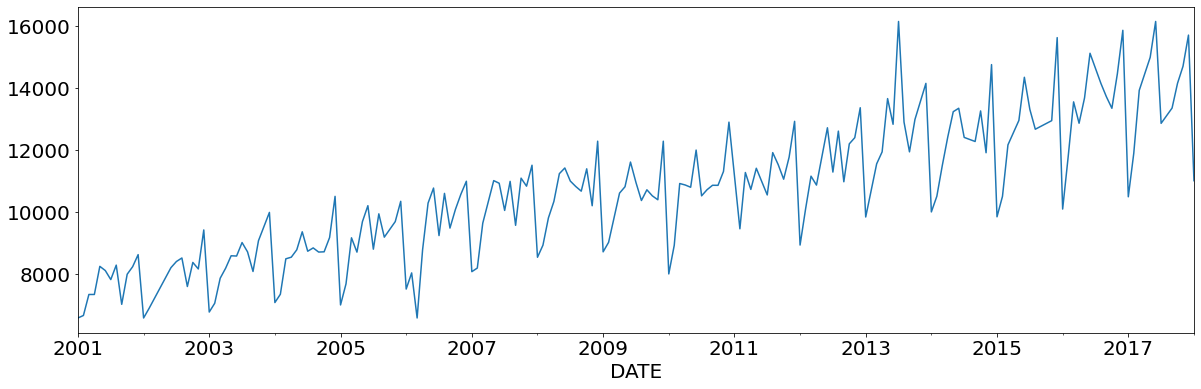

In [25]:
X_train.Sales.plot()

In [26]:
# We need to make the TS stationary 

In [31]:
# X_train.Sales.diff(1).plot()

In [30]:
stationary_X_train = X_train.copy()
stationary_X_train.Sales = stationary_X_train.Sales.diff(1)
stationary_X_train.dropna(inplace=True)


def Dickey_Fuller_test(ts,significances_level = 0.05):
    p_value = sm.tsa.stattools.adfuller(ts)[1]
    if p_value <= significances_level:
        print("Time Series is Stationary")
    else:
        print("Time Series is NOT Stationary")
    print("P_value is: ", p_value)
    
Dickey_Fuller_test(stationary_X_train.Sales,significances_level = 0.05)



Time Series is Stationary
P_value is:  5.358523292442637e-16


## AR


In [77]:
model = SARIMAX(stationary_X_train,order=(3,0,0))
model = model.fit(disp=True)

X_test["Pred"] = model.forecast(steps=12)

<AxesSubplot:xlabel='DATE'>

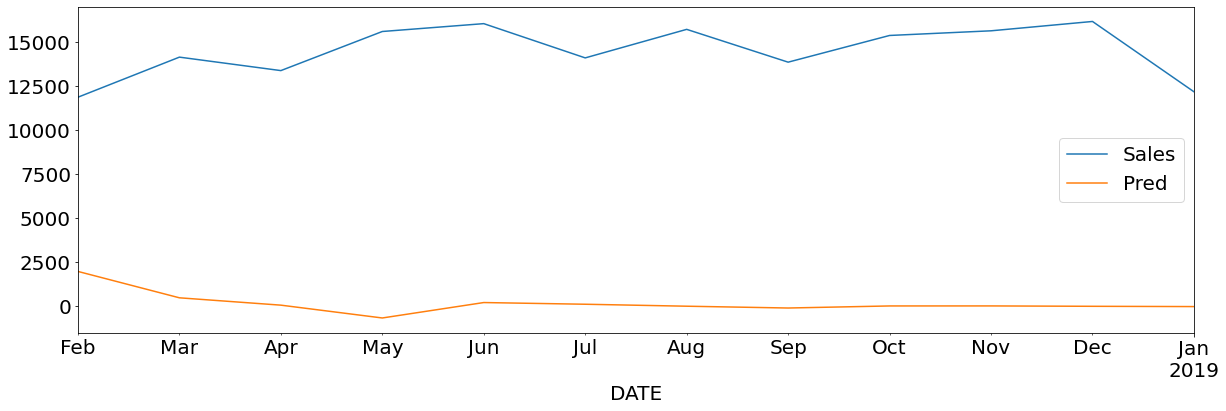

In [78]:
X_test.plot()

    # this happened because, 
        
          we run AR(3) model on y'(t) and compared with y^(t)
          
          so we have to do post processing on prediction (need to integrate the data)


In [79]:
# model.forecast(steps=12).cumsum() + X_train.Sales[-1]
   # integrate the differences        + adding the last value

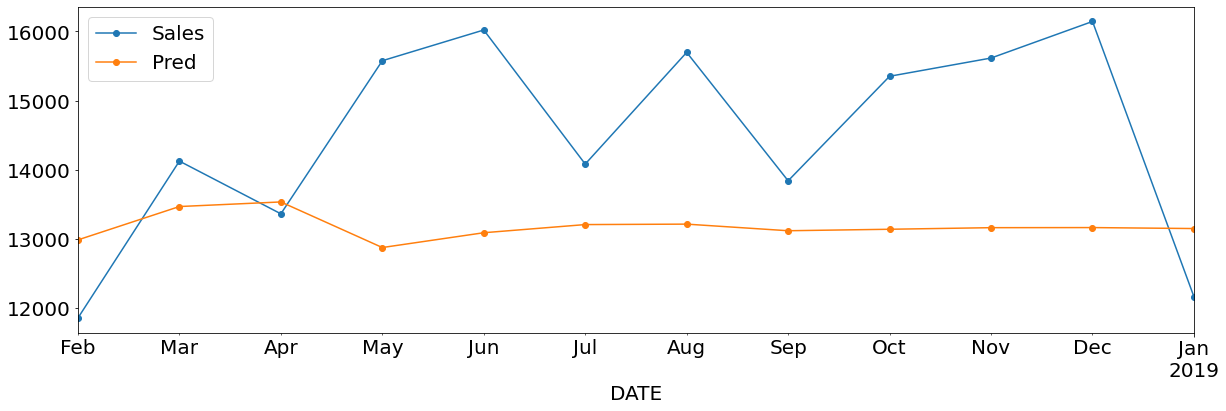

MAE : 1693.798
RMSE : 1956.87
MAPE: 0.113


In [80]:
X_test["Pred"] = model.forecast(steps=12).cumsum() + X_train.Sales[-1]
               # integrate the differences        + adding the last value
X_test.plot(style="-o")
plt.show()
performance(X_test["Sales"],X_test["Pred"])

## MA(q)

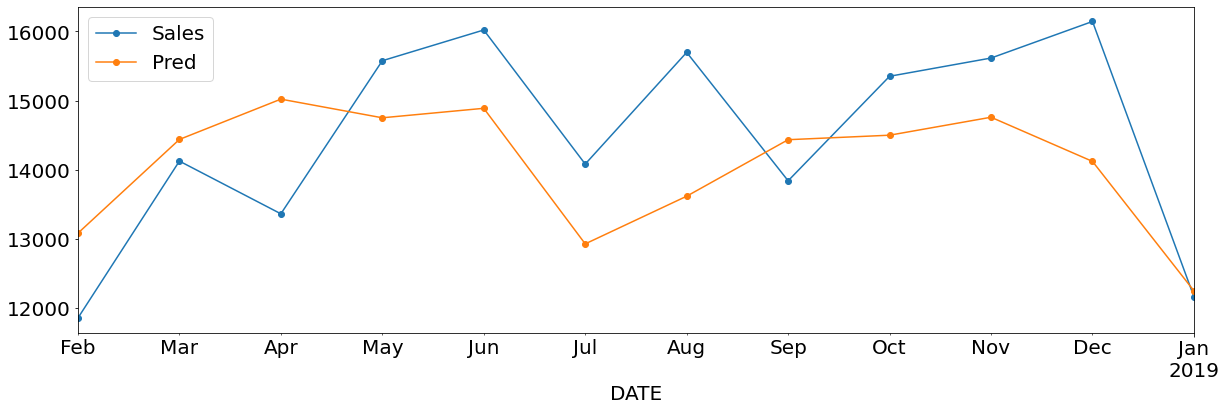

MAE : 1067.787
RMSE : 1222.186
MAPE: 0.073


In [75]:
model = SARIMAX(stationary_X_train,order=(0,0,35))
model = model.fit(disp=True)

X_test["Pred"] = model.forecast(steps=12)
X_test["Pred"] = model.forecast(steps=12).cumsum() + X_train.Sales[-1]
               # integrate the differences        + adding the last value
X_test.plot(style="-o")
plt.show()
performance(X_test["Sales"],X_test["Pred"])

    order : iterable or iterable of iterables, optional
    The (p,d,q) order of the model for the number of AR parameters,
    differences, and MA parameters. `d` must be an integer
    indicating the integration order of the process, while
    `p` and `q` may either be an integers indicating the AR and MA
    orders (so that all lags up to those orders are included) or else
    iterables giving specific AR and / or MA lags to include. Default is
    an AR(1) model: (1,0,0).

## ARMA(p,q)

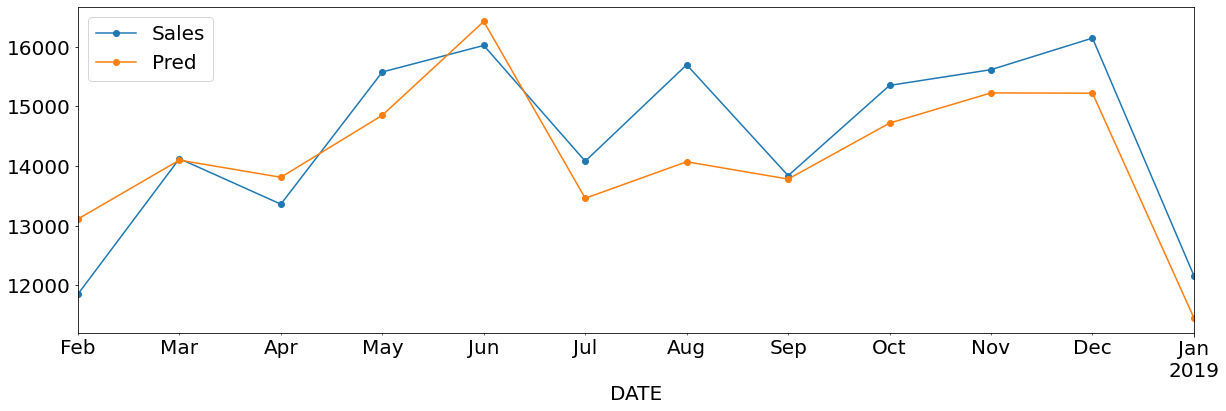

MAE : 651.696
RMSE : 786.193
MAPE: 0.046


In [76]:
model = SARIMAX(stationary_X_train,order=(25,0,15))
model = model.fit(disp=True)

X_test["Pred"] = model.forecast(steps=12)
X_test["Pred"] = model.forecast(steps=12).cumsum() + X_train.Sales[-1]
               # integrate the differences        + adding the last value
X_test.plot(style="-o")
plt.show()
performance(X_test["Sales"],X_test["Pred"])

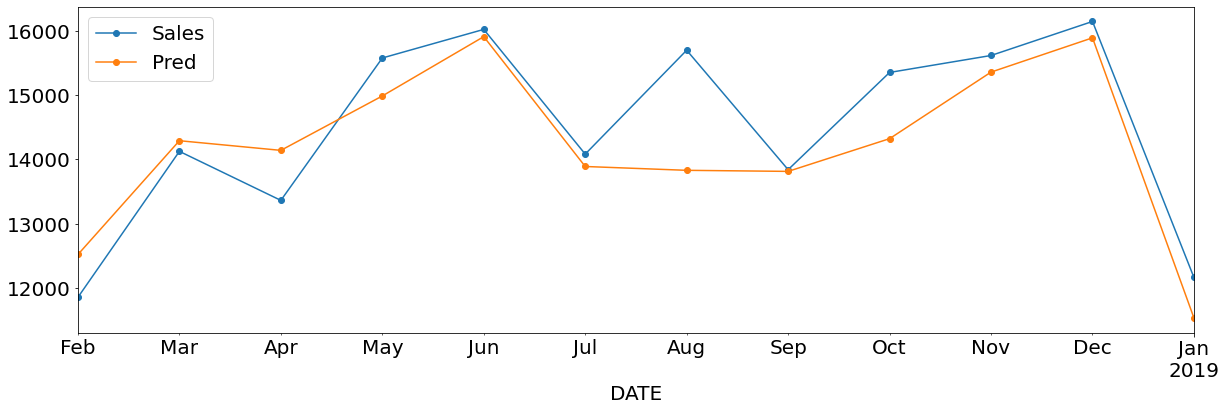

MAE : 548.003
RMSE : 739.424
MAPE: 0.038


In [82]:
model = SARIMAX(stationary_X_train,order=(25,0,3))
model = model.fit(disp=True)

X_test["Pred"] = model.forecast(steps=12)
X_test["Pred"] = model.forecast(steps=12).cumsum() + X_train.Sales[-1]
               # integrate the differences        + adding the last value
X_test.plot(style="-o")
plt.show()
performance(X_test["Sales"],X_test["Pred"])

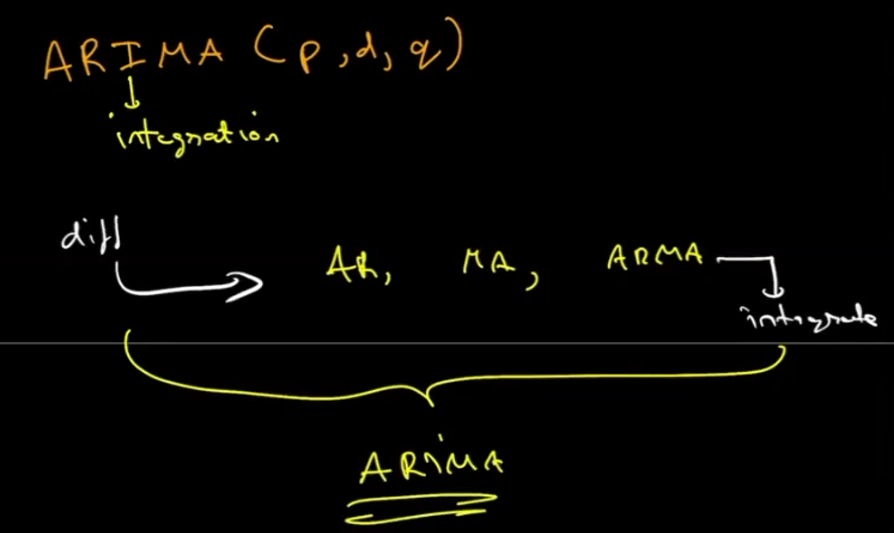

## ARIMA (p,d,q)

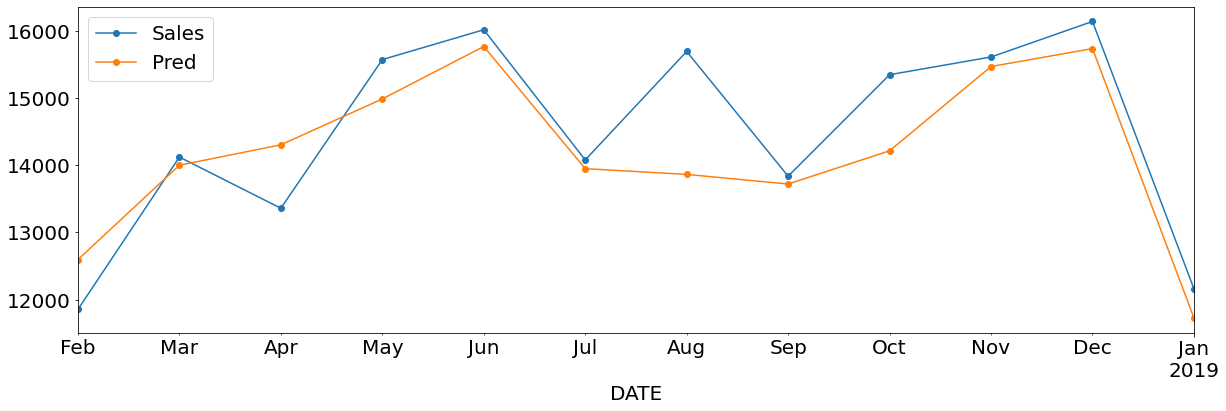

MAE : 570.043
RMSE : 759.064
MAPE: 0.039


In [86]:
model = SARIMAX(X_train.Sales,order=(25,1,5))
model = model.fit(disp=True)
X_test["Pred"] = model.forecast(steps=12)

X_test.plot(style="-o")
plt.show()
performance(X_test["Sales"],X_test["Pred"])

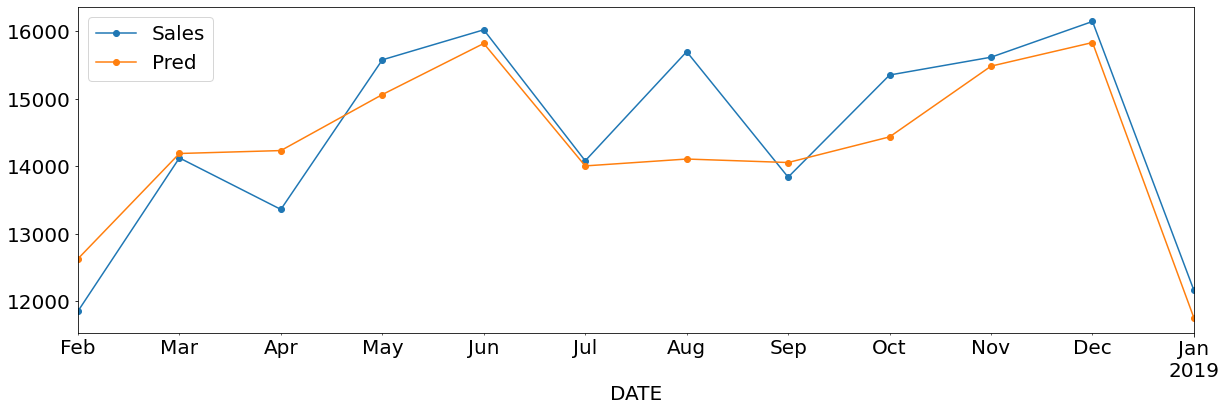

MAE : 506.901
RMSE : 669.406
MAPE: 0.035


In [91]:
model = SARIMAX(X_train.Sales,order=(24,2,3))
model = model.fit(disp=True)
X_test["Pred"] = model.forecast(steps=12)

X_test.plot(style="-o")
plt.show()
performance(X_test["Sales"],X_test["Pred"])

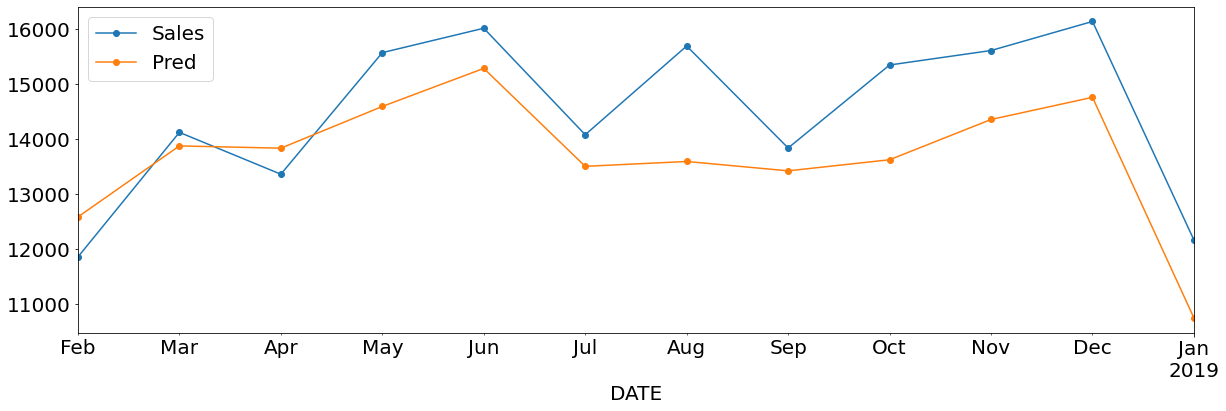

MAE : 1004.162
RMSE : 1145.58
MAPE: 0.069


In [95]:
model = SARIMAX(X_train.Sales,order=(24,3,3))
model = model.fit(disp=True)
X_test["Pred"] = model.forecast(steps=12)

X_test.plot(style="-o")
plt.show()
performance(X_test["Sales"],X_test["Pred"])

    seasonal_order : iterable, optional
    The (P,D,Q,s) order of the seasonal component of the model for the
    AR parameters, differences, MA parameters, and periodicity.
    `D` must be an integer indicating the integration order of the process,
    while `P` and `Q` may either be an integers indicating the AR and MA
    orders (so that all lags up to those orders are included) or else
    iterables giving specific AR and / or MA lags to include. `s` is an
    integer giving the periodicity (number of periods in season), often it
    is 4 for quarterly data or 12 for monthly data. Default is no seasonal
    effect.

## SARIMA - p,d,q,P,D,Q,s

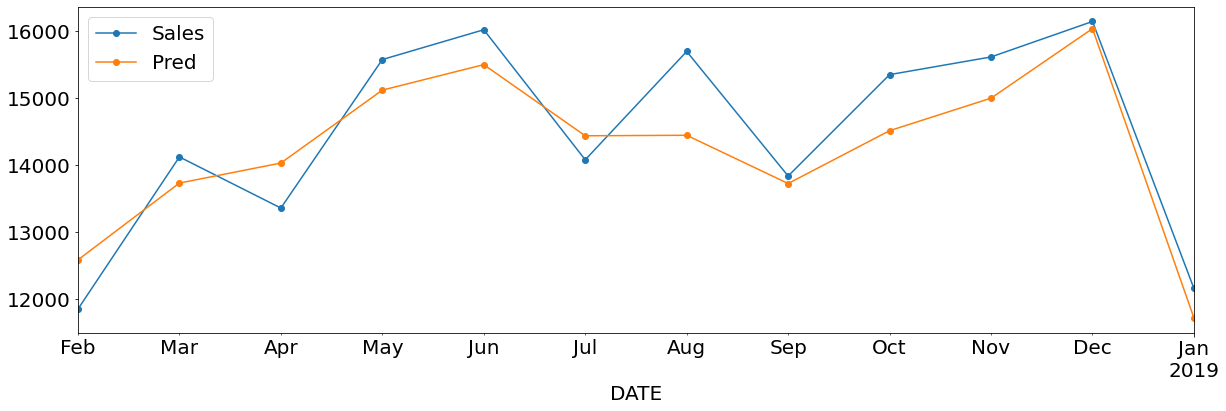

MAE : 541.139
RMSE : 619.916
MAPE: 0.038


In [106]:
model = SARIMAX(X_train.Sales,
                order=(5,1,5),
                seasonal_order=(1, 1, 1, 12)
               )
model = model.fit(disp=True)
X_test["Pred"] = model.forecast(steps=12)

X_test.plot(style="-o")
plt.show()
performance(X_test["Sales"],X_test["Pred"])

## AutoRegressive Integrated Moving Average

In [112]:
# ARIMA : Auto regression iintegration moving average
# ARIMA family algo : 

    
    
        When TS has
        NO trend             we can use : Single Exponential Smoothing  , ARMA
        NO seasonality : 
        
        
        TS has trend :        Double Exponential Smoothing 
                              ARIMA 
                               
        TS has 
        trend + seasonality:      Triple Exponential Smoothing
                                  SARIMA
                                  
        TS has 
        Trend + seasonality
        + exdogeneous variable:   SARIMAX 

##  Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors  model


    SARIMAX(
        endog,
        exog=None,
        order=(1, 0, 0),
        seasonal_order=(0, 0, 0, 0),
        trend=None,
        measurement_error=False,
        time_varying_regression=False,
        mle_regression=True,
        simple_differencing=False,
        enforce_stationarity=True,
        enforce_invertibility=True,
        hamilton_representation=False,
        concentrate_scale=False,
        trend_offset=1,
        use_exact_diffuse=False,
        dates=None,
        freq=None,
        missing='none',
        validate_specification=True,
        **kwargs,
    )
    Docstring:     
    Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors
    model

    Parameters
    ----------
    endog : array_like
        The observed time-series process :math:`y`
    exog : array_like, optional
        Array of exogenous regressors, shaped nobs x k.
    order : iterable or iterable of iterables, optional
        The (p,d,q) order of the model for the number of AR parameters,
        differences, and MA parameters. `d` must be an integer
        indicating the integration order of the process, while
        `p` and `q` may either be an integers indicating the AR and MA
        orders (so that all lags up to those orders are included) or else
        iterables giving specific AR and / or MA lags to include. Default is
        an AR(1) model: (1,0,0).
    seasonal_order : iterable, optional
        The (P,D,Q,s) order of the seasonal component of the model for the
        AR parameters, differences, MA parameters, and periodicity.
        `D` must be an integer indicating the integration order of the process,
        while `P` and `Q` may either be an integers indicating the AR and MA
        orders (so that all lags up to those orders are included) or else
        iterables giving specific AR and / or MA lags to include. `s` is an
        integer giving the periodicity (number of periods in season), often it
        is 4 for quarterly data or 12 for monthly data. Default is no seasonal
        effect.
    trend : str{'n','c','t','ct'} or iterable, optional
        Parameter controlling the deterministic trend polynomial :math:`A(t)`.
        Can be specified as a string where 'c' indicates a constant (i.e. a
        degree zero component of the trend polynomial), 't' indicates a
        linear trend with time, and 'ct' is both. Can also be specified as an
        iterable defining the non-zero polynomial exponents to include, in
        increasing order. For example, `[1,1,0,1]` denotes
        :math:`a + bt + ct^3`. Default is to not include a trend component.
    measurement_error : bool, optional
        Whether or not to assume the endogenous observations `endog` were
        measured with error. Default is False.
    time_varying_regression : bool, optional
        Used when an explanatory variables, `exog`, are provided provided
        to select whether or not coefficients on the exogenous regressors are
        allowed to vary over time. Default is False.
    mle_regression : bool, optional
        Whether or not to use estimate the regression coefficients for the
        exogenous variables as part of maximum likelihood estimation or through
        the Kalman filter (i.e. recursive least squares). If
        `time_varying_regression` is True, this must be set to False. Default
        is True.
    simple_differencing : bool, optional
        Whether or not to use partially conditional maximum likelihood
        estimation. If True, differencing is performed prior to estimation,
        which discards the first :math:`s D + d` initial rows but results in a
        smaller state-space formulation. See the Notes section for important
        details about interpreting results when this option is used. If False,
        the full SARIMAX model is put in state-space form so that all
        datapoints can be used in estimation. Default is False.
    enforce_stationarity : bool, optional
        Whether or not to transform the AR parameters to enforce stationarity
        in the autoregressive component of the model. Default is True.
    enforce_invertibility : bool, optional
        Whether or not to transform the MA parameters to enforce invertibility
        in the moving average component of the model. Default is True.
    hamilton_representation : bool, optional
        Whether or not to use the Hamilton representation of an ARMA process
        (if True) or the Harvey representation (if False). Default is False.
    concentrate_scale : bool, optional
        Whether or not to concentrate the scale (variance of the error term)
        out of the likelihood. This reduces the number of parameters estimated
        by maximum likelihood by one, but standard errors will then not
        be available for the scale parameter.
    trend_offset : int, optional
        The offset at which to start time trend values. Default is 1, so that
        if `trend='t'` the trend is equal to 1, 2, ..., nobs. Typically is only
        set when the model created by extending a previous dataset.
    use_exact_diffuse : bool, optional
        Whether or not to use exact diffuse initialization for non-stationary
        states. Default is False (in which case approximate diffuse
        initialization is used).
    **kwargs
        Keyword arguments may be used to provide default values for state space
        matrices or for Kalman filtering options. See `Representation`, and
        `KalmanFilter` for more details.

    Attributes
    ----------
    measurement_error : bool
        Whether or not to assume the endogenous
        observations `endog` were measured with error.
    state_error : bool
        Whether or not the transition equation has an error component.
    mle_regression : bool
        Whether or not the regression coefficients for
        the exogenous variables were estimated via maximum
        likelihood estimation.
    state_regression : bool
        Whether or not the regression coefficients for
        the exogenous variables are included as elements
        of the state space and estimated via the Kalman
        filter.
    time_varying_regression : bool
        Whether or not coefficients on the exogenous
        regressors are allowed to vary over time.
    simple_differencing : bool
        Whether or not to use partially conditional maximum likelihood
        estimation.
    enforce_stationarity : bool
        Whether or not to transform the AR parameters
        to enforce stationarity in the autoregressive
        component of the model.
    enforce_invertibility : bool
        Whether or not to transform the MA parameters
        to enforce invertibility in the moving average
        component of the model.
    hamilton_representation : bool
        Whether or not to use the Hamilton representation of an ARMA process.
    trend : str{'n','c','t','ct'} or iterable
        Parameter controlling the deterministic
        trend polynomial :math:`A(t)`. See the class
        parameter documentation for more information.
    polynomial_ar : ndarray
        Array containing autoregressive lag polynomial lags, ordered from
        lowest degree to highest. The polynomial begins with lag 0.
        Initialized with ones, unless a coefficient is constrained to be
        zero (in which case it is zero).
    polynomial_ma : ndarray
        Array containing moving average lag polynomial lags, ordered from
        lowest degree to highest. Initialized with ones, unless a coefficient
        is constrained to be zero (in which case it is zero).
    polynomial_seasonal_ar : ndarray
        Array containing seasonal moving average lag
        polynomial lags, ordered from lowest degree
        to highest. Initialized with ones, unless a
        coefficient is constrained to be zero (in which
        case it is zero).
    polynomial_seasonal_ma : ndarray
        Array containing seasonal moving average lag
        polynomial lags, ordered from lowest degree
        to highest. Initialized with ones, unless a
        coefficient is constrained to be zero (in which
        case it is zero).
    polynomial_trend : ndarray
        Array containing trend polynomial coefficients,
        ordered from lowest degree to highest. Initialized
        with ones, unless a coefficient is constrained to be
        zero (in which case it is zero).
  

# what is p,d,q,P,D,Q,s in SARIMAX

- In a Seasonal Autoregressive Integrated Moving Average with Exogenous variables (SARIMAX) model, the parameters p, d, q, P, D, Q, and s are used to specify the order of the autoregressive, differencing, and moving average terms, as well as the seasonal components of the model.

- Here's what each parameter represents:



- p:
    - The order of the autoregressive (AR) term, which captures the dependence of the current value on the past values of the same variable. In other words, it is the number of lagged observations to include in the model.

- d:
    - The order of differencing required to make the time series stationary. Stationarity means that the mean, variance, and autocorrelation structure of the series do not depend on time. If the series is not stationary, differencing can be used to remove trends and seasonality.

- q:
    - The order of the moving average (MA) term, which captures the dependence of the current value on past errors or residuals from the model.

- P:
    - The seasonal order of the autoregressive (AR) term. This captures the dependence of the current value on the past values of the same variable, but at a seasonal interval.

- D:
    - The seasonal order of differencing required to make the seasonal time series stationary.

- Q:
    - The seasonal order of the moving average (MA) term. This captures the dependence of the current value on past errors or residuals from the model, but at a seasonal interval.


- s: 
    - The number of time steps in each seasonal period. For example, if the data is monthly and there is a yearly seasonality, then s=12.


- In summary, p, d, and q specify the non-seasonal components of the SARIMAX model, while P, D, Q, and s specify the seasonal components. Together, these parameters define the structure of the SARIMAX model and allow for forecasting of future values.